In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPool1D, BatchNormalization, Dropout, LSTM, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical

from cv2 import imread, resize

In [2]:
data = pd.read_csv('../input/water-quality/waterQuality1.csv')

data = data.drop('ammonia', axis = 1)
data = data.drop('flouride', axis = 1)
data = data.drop('selenium', axis = 1)
data = data.drop('uranium', axis = 1)

data = data[data['is_safe'] != '#NUM!']
data['is_safe'] = data['is_safe'].astype(int)

columns = dict(zip(list(range(data.shape[1])), data.columns.values.tolist()))
is_safe = data['is_safe']

data = pd.DataFrame(StandardScaler().fit_transform(data)).rename(columns = columns)
data['is_safe'] = is_safe
data = data.dropna()
data.head(6)

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,silver,is_safe
0,0.777403,-0.480875,1.054205,-0.993241,-0.711941,2.152993,-0.973050,-0.363345,-0.869387,-0.781070,1.129767,-0.348629,0.609178,1.203362,1.661842,1.338736,1.0
1,1.306945,-0.599632,1.432447,-1.131948,1.208552,1.598765,-0.223303,1.002460,0.849782,0.009785,-1.409197,1.046960,-0.739005,0.892977,0.124811,0.851134,1.0
2,0.271572,-0.480875,-0.812340,-0.965499,0.803417,1.044536,-1.202564,-0.818614,-0.861452,-0.368450,0.783298,-0.383518,0.272132,1.911763,1.786699,2.035310,0.0
3,0.548198,-0.480875,1.144654,-1.159690,1.968179,-0.802892,1.306793,1.184567,1.008475,-1.434385,-1.517469,-0.069511,-0.401960,-0.415275,-0.516695,2.104968,1.0
4,0.200439,-0.520460,-1.124801,-1.020982,0.191820,1.635713,-0.361012,-0.575804,-0.866742,0.302058,-0.555658,-0.383518,-0.739005,0.024578,-0.219622,-0.611672,1.0
5,0.216246,-0.520460,1.078873,-1.104207,-0.536643,0.675051,0.878366,1.063162,0.902680,0.611523,-0.012496,0.977180,0.272132,0.605207,1.076306,0.293875,1.0


In [3]:
X = data.drop('is_safe', axis = 1)
Y = data['is_safe']

x = data.drop('is_safe', axis = 1)
y = data['is_safe']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 25)

y_train = np.expand_dims(y_train, axis = -1)
x_train = np.expand_dims(x_train, axis = -1)
x_test = np.expand_dims(x_test, axis = -1)
y_tset = np.expand_dims(x_test, axis = -1)

print(y_train.shape)
print(x_train.shape)

(6394, 1)
(6394, 16, 1)


In [4]:
model = Sequential()
model.add(Conv1D(32, 3, padding="same",input_shape =(16,1), activation='relu'))
model.add(MaxPool1D(pool_size=(2)))  
model.add(Dropout(0.2))
model.add(Conv1D(32, 3, padding="same", activation='relu'))
model.add(MaxPool1D(pool_size=(2)))  
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=50))
model.add(Dense(units=1,activation='sigmoid'))

2022-10-26 22:52:52.490183: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 22:52:52.491126: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 22:52:52.639235: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 22:52:52.640028: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 22:52:52.640797: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [5]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
history=model.fit(x_train, y_train,
          batch_size=500,
          epochs=100,
          validation_split=0.2)

2022-10-26 22:52:56.848408: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-10-26 22:52:58.885267: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


11/11 [==============================] - 10s 35ms/step - loss: 0.4931 - accuracy: 0.8178 - val_loss: 0.3912 - val_accuracy: 0.8718
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.3763 - accuracy: 0.8880 - val_loss: 0.3826 - val_accuracy: 0.8718
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.3509 - accuracy: 0.8880 - val_loss: 0.3711 - val_accuracy: 0.8718
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 0.3399 - accuracy: 0.8880 - val_loss: 0.3475 - val_accuracy: 0.8718
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 0.3241 - accuracy: 0.8880 - val_loss: 0.3303 - val_accuracy: 0.8718
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.3099 - accuracy: 0.8880 - val_loss: 0.3112 - val_accuracy: 0.8718
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.2954 - accuracy: 0.8880 - val_loss: 0.2922 - val_accuracy: 0.8780
Epoch 8/100
11/11 [====

In [7]:
evaluation = model.evaluate(x_test, y_test, verbose=1)

50/50 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.9350


Text(0, 0.5, 'Loss')

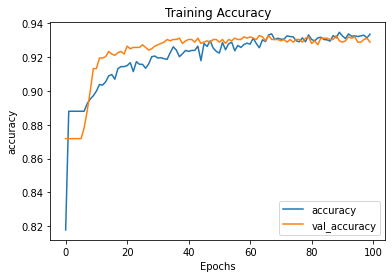

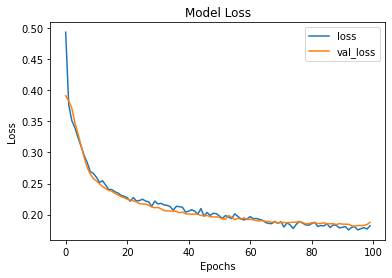

In [8]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")